In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\natha\OneDrive\Desktop\nerdy-shit\python_shit\digit_recognizer\venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8814 - loss: 0.4135
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9691 - loss: 0.1035
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9797 - loss: 0.0655
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9850 - loss: 0.0482
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9876 - loss: 0.0383


In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9726 - loss: 0.0983
Test accuracy: 0.9761999845504761


In [6]:
model.save("digit_model.keras")


### PREDICT INPUT (digit.png)

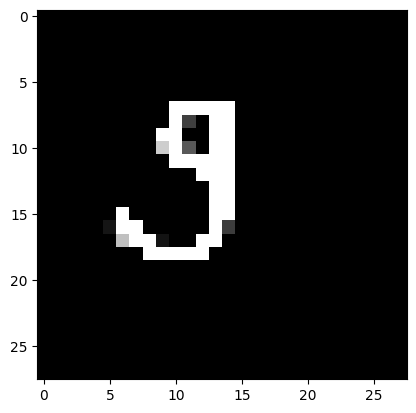

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
Predicted digit: 2
   Digit  Probability
0      0     0.001500
1      1    21.003099
2      2    44.122601
3      3     8.357500
4      4     0.156700
5      5     0.038000
6      6     0.000800
7      7    23.273001
8      8     2.327600
9      9     0.719100


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


img = cv2.imread("digit.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = 255 - img
img = img / 255.0
img = img.reshape(1, 28, 28)
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

prediction = model.predict(img)
print("Predicted digit:", prediction.argmax())


probs = prediction

# Flatten to 1D
probs = probs.flatten()

# Create a dataframe with digits and probabilities
df = pd.DataFrame({
    'Digit': list(range(10)),
    'Probability': probs
})

df['Probability'] = df['Probability'].round(6) * 100

print(df)




Actual label: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted digit: 1


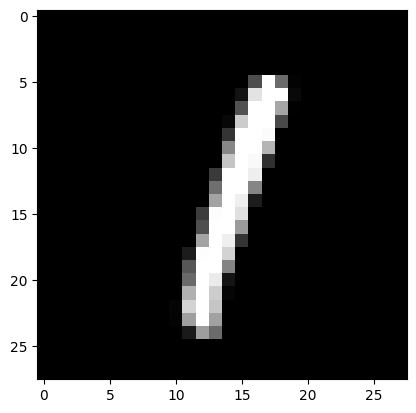

In [8]:
test_img = x_test[5].reshape(1, 28, 28)
print("Actual label:", y_test[5])
prediction = model.predict(test_img)
print("Predicted digit:", prediction.argmax())
plt.imshow(test_img.reshape(28, 28), cmap='gray')
plt.show()
